In [1]:
import urllib
import requests 
from bs4 import BeautifulSoup
import json



In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize

In [4]:
import time
import warnings
warnings.filterwarnings(action='ignore')
from IPython.display import Image


In [5]:
# 폰트 설정
import matplotlib.font_manager as fm
fm.findSystemFonts(fontpaths=None, fontext='ttf')

['C:\\Windows\\Fonts\\HATTEN.TTF',
 'C:\\Windows\\Fonts\\PAPYRUS.TTF',
 'C:\\Windows\\Fonts\\ANTQUAB.TTF',
 'C:\\Windows\\Fonts\\SHOWG.TTF',
 'C:\\Windows\\Fonts\\ARIALNI.TTF',
 'C:\\Windows\\Fonts\\BAUHS93.TTF',
 'C:\\Windows\\Fonts\\calibril.ttf',
 'C:\\Windows\\Fonts\\ROCKEB.TTF',
 'C:\\Windows\\Fonts\\Candarali.ttf',
 'C:\\Windows\\Fonts\\CASTELAR.TTF',
 'C:\\Windows\\Fonts\\Inkfree.ttf',
 'C:\\Windows\\Fonts\\GILBI___.TTF',
 'C:\\Windows\\Fonts\\GLECB.TTF',
 'C:\\Windows\\Fonts\\HARNGTON.TTF',
 'C:\\Windows\\Fonts\\SitkaZ.ttc',
 'C:\\Windows\\Fonts\\ARIALNBI.TTF',
 'C:\\Windows\\Fonts\\monbaiti.ttf',
 'C:\\Windows\\Fonts\\comicbd.ttf',
 'C:\\Windows\\Fonts\\FRSCRIPT.TTF',
 'C:\\Windows\\Fonts\\CHILLER.TTF',
 'C:\\Windows\\Fonts\\corbelz.ttf',
 'C:\\Windows\\Fonts\\BRITANIC.TTF',
 'C:\\Windows\\Fonts\\HMFMMUEX.TTC',
 'C:\\Windows\\Fonts\\tahoma.ttf',
 'C:\\Windows\\Fonts\\HMFMPYUN.TTF',
 'C:\\Windows\\Fonts\\BERNHC.TTF',
 'C:\\Windows\\Fonts\\GILSANUB.TTF',
 'C:\\Windows\\Fonts\\GO

In [6]:
plt.rc('font', family='gulim')

In [7]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [8]:
import os
os.chdir('C:/Users/X1Carbon/Desktop/data_project/gameData/game_tree')

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns

In [10]:
%matplotlib inline 

In [62]:
# 모바일 게임 랭킹 데이터 불러오기
df = pd.read_csv('C:/Users/X1Carbon/Desktop/data_project/gameData/game_tree/steam_all.csv')
df

,Unnamed: 0,column-1,column-1 2,column-2,column-3,column-4
0,0,1,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,FPS
1,1,2,NaN,Stardew Valley,ConcernedApe,롤플레잉
2,2,3,NaN,Grand Theft Auto V,Rockstar Games,액션
3,3,4,NaN,ONE PIECE: PIRATE WARRIORS 4,BANDAI NAMCO Entertainment,액션
4,4,5,NaN,DOOM Eternal,Bethesda Softworks,액션
...,...,...,...,...,...,...
4835,35,36,(-1),그랜드 체이스,KOG,RPG
4836,36,37,(-7),쿼리,2K Games,공포 어드벤처
4837,37,38,(-1),문명6,2K,턴제 전략
4838,38,39,(-3),삼국지14,"KOEI TECMO GAMES CO., LTD.",시뮬레이션


In [63]:
# 40개씩 끊어주기
i = df[df['column-1']>40].index
steam_top40 = df.drop(i)
steam_top40

,Unnamed: 0,column-1,column-1 2,column-2,column-3,column-4
0,0,1,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,FPS
1,1,2,NaN,Stardew Valley,ConcernedApe,롤플레잉
2,2,3,NaN,Grand Theft Auto V,Rockstar Games,액션
3,3,4,NaN,ONE PIECE: PIRATE WARRIORS 4,BANDAI NAMCO Entertainment,액션
4,4,5,NaN,DOOM Eternal,Bethesda Softworks,액션
...,...,...,...,...,...,...
4835,35,36,(-1),그랜드 체이스,KOG,RPG
4836,36,37,(-7),쿼리,2K Games,공포 어드벤처
4837,37,38,(-1),문명6,2K,턴제 전략
4838,38,39,(-3),삼국지14,"KOEI TECMO GAMES CO., LTD.",시뮬레이션


In [50]:
steam_top40.dtypes

level_0     int64
rank        int64
change     object
name       object
service    object
genre      object
dtype: object

In [64]:
# 컬럼명 수정
steam_top40=steam_top40.rename(columns={'Unnamed: 0':'level_0','column-1':'rank','column-1 2':'change','column-2':'name', 'column-3':'service', 'column-4':'genre'})
steam_top40

,level_0,rank,change,name,service,genre
0,0,1,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,FPS
1,1,2,NaN,Stardew Valley,ConcernedApe,롤플레잉
2,2,3,NaN,Grand Theft Auto V,Rockstar Games,액션
3,3,4,NaN,ONE PIECE: PIRATE WARRIORS 4,BANDAI NAMCO Entertainment,액션
4,4,5,NaN,DOOM Eternal,Bethesda Softworks,액션
...,...,...,...,...,...,...
4835,35,36,(-1),그랜드 체이스,KOG,RPG
4836,36,37,(-7),쿼리,2K Games,공포 어드벤처
4837,37,38,(-1),문명6,2K,턴제 전략
4838,38,39,(-3),삼국지14,"KOEI TECMO GAMES CO., LTD.",시뮬레이션


In [65]:
# 인덱스가 이상해서 인덱스 리셋 시켜주기
steam_top40 = steam_top40.reset_index()
steam_top40

,index,level_0,rank,change,name,service,genre
0,0,0,1,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,FPS
1,1,1,2,NaN,Stardew Valley,ConcernedApe,롤플레잉
2,2,2,3,NaN,Grand Theft Auto V,Rockstar Games,액션
3,3,3,4,NaN,ONE PIECE: PIRATE WARRIORS 4,BANDAI NAMCO Entertainment,액션
4,4,4,5,NaN,DOOM Eternal,Bethesda Softworks,액션
...,...,...,...,...,...,...,...
4835,4835,35,36,(-1),그랜드 체이스,KOG,RPG
4836,4836,36,37,(-7),쿼리,2K Games,공포 어드벤처
4837,4837,37,38,(-1),문명6,2K,턴제 전략
4838,4838,38,39,(-3),삼국지14,"KOEI TECMO GAMES CO., LTD.",시뮬레이션


In [66]:
# week_num 추가
steam_top40.insert(0, 'week_num', 0)
steam_top40

,week_num,index,level_0,rank,change,name,service,genre
0,0,0,0,1,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,FPS
1,0,1,1,2,NaN,Stardew Valley,ConcernedApe,롤플레잉
2,0,2,2,3,NaN,Grand Theft Auto V,Rockstar Games,액션
3,0,3,3,4,NaN,ONE PIECE: PIRATE WARRIORS 4,BANDAI NAMCO Entertainment,액션
4,0,4,4,5,NaN,DOOM Eternal,Bethesda Softworks,액션
...,...,...,...,...,...,...,...,...
4835,0,4835,35,36,(-1),그랜드 체이스,KOG,RPG
4836,0,4836,36,37,(-7),쿼리,2K Games,공포 어드벤처
4837,0,4837,37,38,(-1),문명6,2K,턴제 전략
4838,0,4838,38,39,(-3),삼국지14,"KOEI TECMO GAMES CO., LTD.",시뮬레이션


In [79]:
# week_num 순서 정렬
share = 120 - steam_top40['index']//40
steam_top40['week_num'] =share
steam_top40

,week_num,index,level_0,rank,change,name,service,genre
0,120,0,0,1,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,FPS
1,120,1,1,2,NaN,Stardew Valley,ConcernedApe,롤플레잉
2,120,2,2,3,NaN,Grand Theft Auto V,Rockstar Games,액션
3,120,3,3,4,NaN,ONE PIECE: PIRATE WARRIORS 4,BANDAI NAMCO Entertainment,액션
4,120,4,4,5,NaN,DOOM Eternal,Bethesda Softworks,액션
...,...,...,...,...,...,...,...,...
4835,0,4835,35,36,(-1),그랜드 체이스,KOG,RPG
4836,0,4836,36,37,(-7),쿼리,2K Games,공포 어드벤처
4837,0,4837,37,38,(-1),문명6,2K,턴제 전략
4838,0,4838,38,39,(-3),삼국지14,"KOEI TECMO GAMES CO., LTD.",시뮬레이션


In [80]:
steam_top40.dtypes

week_num     int64
index        int64
level_0      int64
rank         int64
change      object
name        object
service     object
genre       object
dtype: object

# 스팀 그래프

In [118]:
os.chdir('C:/Users/X1Carbon/Desktop/data_project/gameData/game_tree_graph')
steam_top20= pd.read_csv('C:/Users/X1Carbon/Desktop/data_project/gameData/game_tree_graph/pretty_steam_graph.csv')

In [119]:
steam_top20

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,week_num,rank,column-1 2,name,company,type
0,0,0,0,0,1,NaN,플레이어언노운스 배틀그라운드,PUBG Corporation,FPS
1,1,1,1,0,2,NaN,스타듀밸리,ConcernedApe,롤플레잉
2,2,2,2,0,3,NaN,Grand Theft Auto V,Rockstar Games,액션
3,3,3,3,0,4,NaN,ONE PIECE: PIRATE WARRIORS 4,BANDAI NAMCO Entertainment,액션
4,4,4,4,0,5,NaN,DOOM Eternal,Bethesda Softworks,액션
...,...,...,...,...,...,...,...,...,...
2455,2455,2455,2455,122,16,(-1),DNF 듀얼,"NEOPLE Inc., NEXON Korea Corporation.",대전 액션
2456,2456,2456,2456,122,17,(+1),더 심즈 4,Electronic Arts,시뮬레이션
2457,2457,2457,2457,122,18,(+2),갓 오브 워,PlayStation PC LLC,액션 어드벤처
2458,2458,2458,2458,122,19,(-3),레디오어낫,VOID Interactive,FPS


In [120]:
# week_num 순서 정렬
share = 122 - steam_top20['Unnamed: 0']//20
steam_top20['week_num'] =share

In [121]:
steam_top20

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,week_num,rank,column-1 2,name,company,type
0,0,0,0,122,1,NaN,플레이어언노운스 배틀그라운드,PUBG Corporation,FPS
1,1,1,1,122,2,NaN,스타듀밸리,ConcernedApe,롤플레잉
2,2,2,2,122,3,NaN,Grand Theft Auto V,Rockstar Games,액션
3,3,3,3,122,4,NaN,ONE PIECE: PIRATE WARRIORS 4,BANDAI NAMCO Entertainment,액션
4,4,4,4,122,5,NaN,DOOM Eternal,Bethesda Softworks,액션
...,...,...,...,...,...,...,...,...,...
2455,2455,2455,2455,0,16,(-1),DNF 듀얼,"NEOPLE Inc., NEXON Korea Corporation.",대전 액션
2456,2456,2456,2456,0,17,(+1),더 심즈 4,Electronic Arts,시뮬레이션
2457,2457,2457,2457,0,18,(+2),갓 오브 워,PlayStation PC LLC,액션 어드벤처
2458,2458,2458,2458,0,19,(-3),레디오어낫,VOID Interactive,FPS


In [122]:
# 최종 프레임 저장
os.chdir('C:/Users/X1Carbon/Desktop/data_project/gameData/game_tree_graph')
steam_top20.to_csv('pretty_steam_graph.csv')

In [123]:
steam_top20['name'].value_counts().sort_index()

ARK: Survival Evolved              1
Assassin's Creed® Syndicate        1
DARK SOULS™ III                    1
DNF 듀얼                             4
DOOM Eternal                       1
                                  ..
호라이즌 제로 던 컴플리트 에디션                15
휴먼: 폴 플랫                          65
휴먼카인드                              4
히트맨 - GAME OF THE YEAR EDITION     2
히트맨- GAME OF THE YEAR EDITION      1
Name: name, Length: 166, dtype: int64

In [124]:
# 스팀 게임 데이터 목록 보기
steam_top20_groupby = steam_top20.groupby('name')['name'].count()
steam_top20_groupby_asc = steam_top20_groupby.sort_values(ascending=False)
steam_top20_groupby_asc

name
스타듀밸리                            123
플레이어언노운스 배틀그라운드                  123
GTA 5                            116
레드 데드 리뎀션 2                      111
어몽 어스                            108
                                ... 
베어 너클 4                            1
Assassin's Creed® Syndicate        1
스트레이                               1
콜 오브 듀티 : 블랙 옵스 3                  1
히트맨- GAME OF THE YEAR EDITION      1
Name: name, Length: 166, dtype: int64

In [125]:
# 스팀 데이터 파일 수 : 123개
# 콘크리스 층 ? 스타듀밸리, 플레이어언노운 배틀그라운드
steam_top20_groupby_asc = pd.DataFrame(steam_top20_groupby_asc, columns=['name'])
steam_top20_groupby_asc

,name
name,
스타듀밸리,123
플레이어언노운스 배틀그라운드,123
GTA 5,116
레드 데드 리뎀션 2,111
어몽 어스,108
...,...
베어 너클 4,1
Assassin's Creed® Syndicate,1
스트레이,1


In [126]:
len(steam_top20.loc[steam_top20['name'] == "PLAYERUNKNOWN'S BATTLEGROUNDS"])

0

In [127]:
# 배틀그라운드 영어 이름 변경 (1개)
steam_top20.replace("PLAYERUNKNOWN'S BATTLEGROUNDS","플레이어언노운스 배틀그라운드")

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,week_num,rank,column-1 2,name,company,type
0,0,0,0,122,1,NaN,플레이어언노운스 배틀그라운드,PUBG Corporation,FPS
1,1,1,1,122,2,NaN,스타듀밸리,ConcernedApe,롤플레잉
2,2,2,2,122,3,NaN,Grand Theft Auto V,Rockstar Games,액션
3,3,3,3,122,4,NaN,ONE PIECE: PIRATE WARRIORS 4,BANDAI NAMCO Entertainment,액션
4,4,4,4,122,5,NaN,DOOM Eternal,Bethesda Softworks,액션
...,...,...,...,...,...,...,...,...,...
2455,2455,2455,2455,0,16,(-1),DNF 듀얼,"NEOPLE Inc., NEXON Korea Corporation.",대전 액션
2456,2456,2456,2456,0,17,(+1),더 심즈 4,Electronic Arts,시뮬레이션
2457,2457,2457,2457,0,18,(+2),갓 오브 워,PlayStation PC LLC,액션 어드벤처
2458,2458,2458,2458,0,19,(-3),레디오어낫,VOID Interactive,FPS


In [ ]:
# 플레이어언노운스 배틀그라운드 그래프

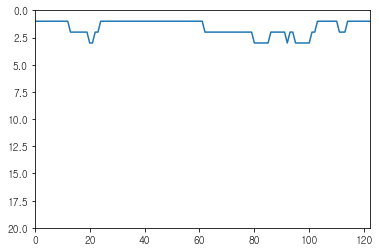

In [128]:
pub = steam_top20.loc[steam_top20['name'] == '플레이어언노운스 배틀그라운드']
plt.plot(pub['week_num'], pub['rank'])
#plt.xlim(185,0)
plt.xlim(0,122)
plt.ylim(20,0)
plt.show()

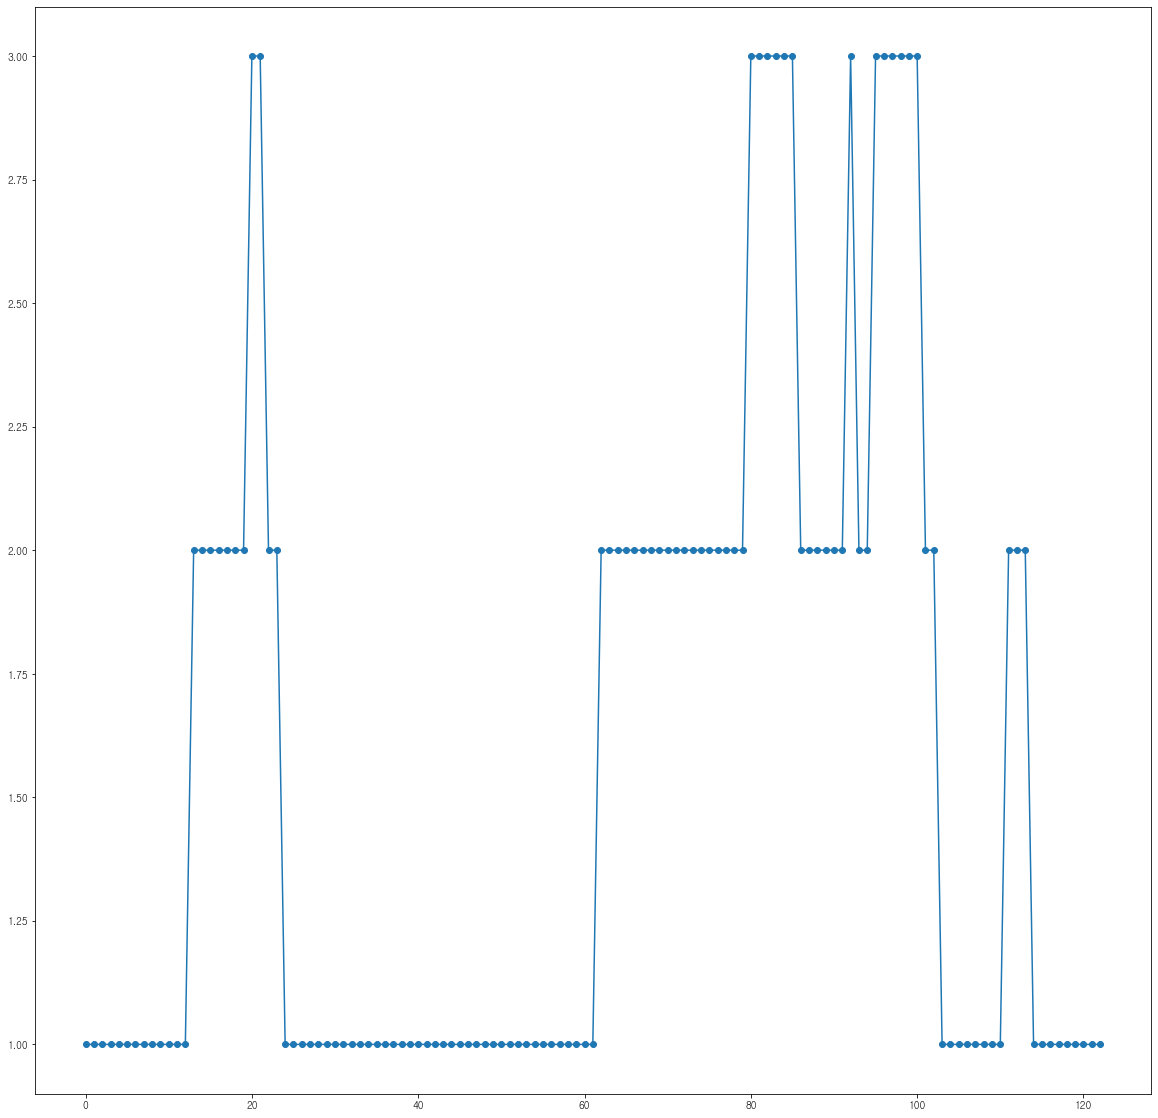

In [129]:
fig = plt.figure(figsize=(20,20)) # 캔버스 생성
fig.set_facecolor('white') # 캔버스 색상 설정
ax = fig.add_subplot() # 그림 프레임 생성

ax.plot(pub['week_num'],pub['rank'],marker='o',label='플레이어언노운스 배틀그라운드')